<a href="https://colab.research.google.com/github/ipanditi/ML/blob/main/data_sci_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
X= [[0,0], [1,1]]
Y= [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)


In [ ]:
from array import array
import numpy as np

clf.predict([[2.,2.]])
np.array([[0. , 1.]])

array([[0., 1.]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

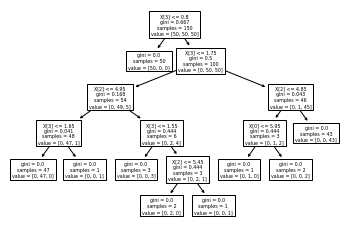

In [ ]:
tree.plot_tree(clf)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

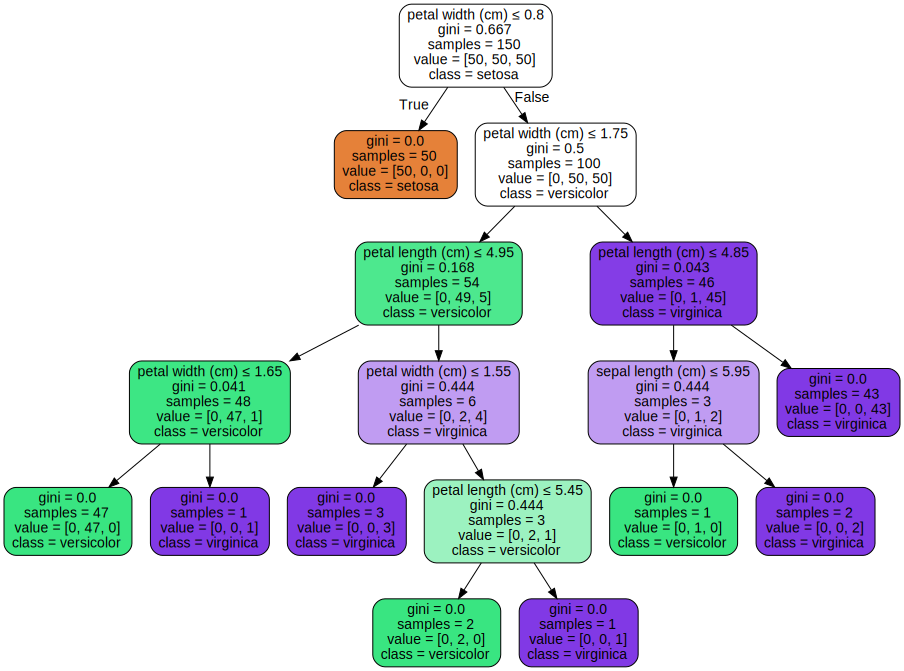

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 

In [ ]:
from sklearn.datasets import load_iris
>>> from sklearn.tree import DecisionTreeClassifier
>>> from sklearn.tree import export_text
>>> iris = load_iris()
>>> decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
>>> decision_tree = decision_tree.fit(iris.data, iris.target)
>>> r = export_text(decision_tree, feature_names=iris['feature_names'])
>>> print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [ ]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])


array([0.5])

**K FOLD CROSS VALIDATION**

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
boston =load_boston()

boston_features = pd.DataFrame(boston.data, columns= boston.feature_names)

X= boston_features['RM'].values.reshape(-1,1)

y= boston.target

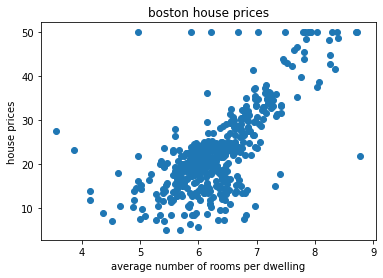

In [ ]:
plt.scatter(X, y)
plt.title('boston house prices')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('house prices')
plt.show()

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
alphas=[1, 1e3, 1e6]

regressor= RidgeCV(alphas= alphas, store_cv_values=True)

regressor.fit(train_X, train_y)

cv_mse = np.mean(regressor.cv_values_, axis=0 )

print(alphas)
print(cv_mse)

[1, 1000.0, 1000000.0]
[43.62528861 73.00797598 85.55049598]


In [ ]:
print(regressor.alpha_)

1.0


In [ ]:
predict_y = regressor.predict(test_X)

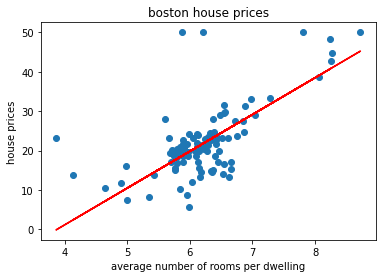

In [ ]:
plt.scatter(test_X, test_y)
plt.plot(test_X, predict_y, color='red')
plt.title('boston house prices')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('house prices')
plt.show()

In [ ]:
alphas=[1e6]

regressor= RidgeCV(alphas= alphas, store_cv_values=True)

regressor.fit(train_X, train_y)

cv_mse = np.mean(regressor.cv_values_, axis=0 )

print(alphas)
print(cv_mse)
predict_y = regressor.predict(test_X)

[1000000.0]
[85.55049598]


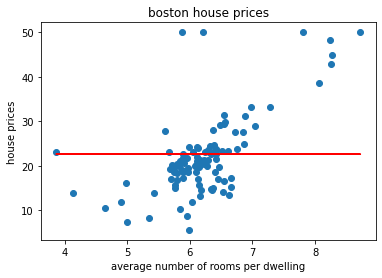

In [ ]:
plt.scatter(test_X, test_y)
plt.plot(test_X, predict_y, color='red')
plt.title('boston house prices')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('house prices')
plt.show()

**OUTLIER ANALYSIS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

standard normal deviation:
when mean=0; standard deviation=1
z-score= (x-mean)/std.dev

anything beyond 3rd std.dev is called an outlier


In [ ]:
outliers=[]
def detect_outliers(data):
  threshold=3
  mean= np.mean(data)
  std= np.std(data)

  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)> threshold:
      outliers.append(i)

  return outliers

In [ ]:
dataset=[23,45,67,89,100,34,89,99,78,65,41,54,8,1009]
outlier_pt=detect_outliers(dataset)

In [ ]:
outlier_pt

[1009]

In [ ]:
quantile1, quantile3= np.percentile(dataset,[25,75])

In [ ]:
print(quantile1,quantile3)

42.0 89.0


In [ ]:
iqr= quantile3-quantile1
print(iqr)

47.0


In [ ]:
lower_bound_value= quantile1 -(1.5*iqr)
upper_bound_value= quantile3 +(1.5*iqr)

In [ ]:
print(lower_bound_value, upper_bound_value)

-28.5 159.5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
df= pd.read_csv(url)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [ ]:
df= pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape


(4898, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [ ]:

df.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


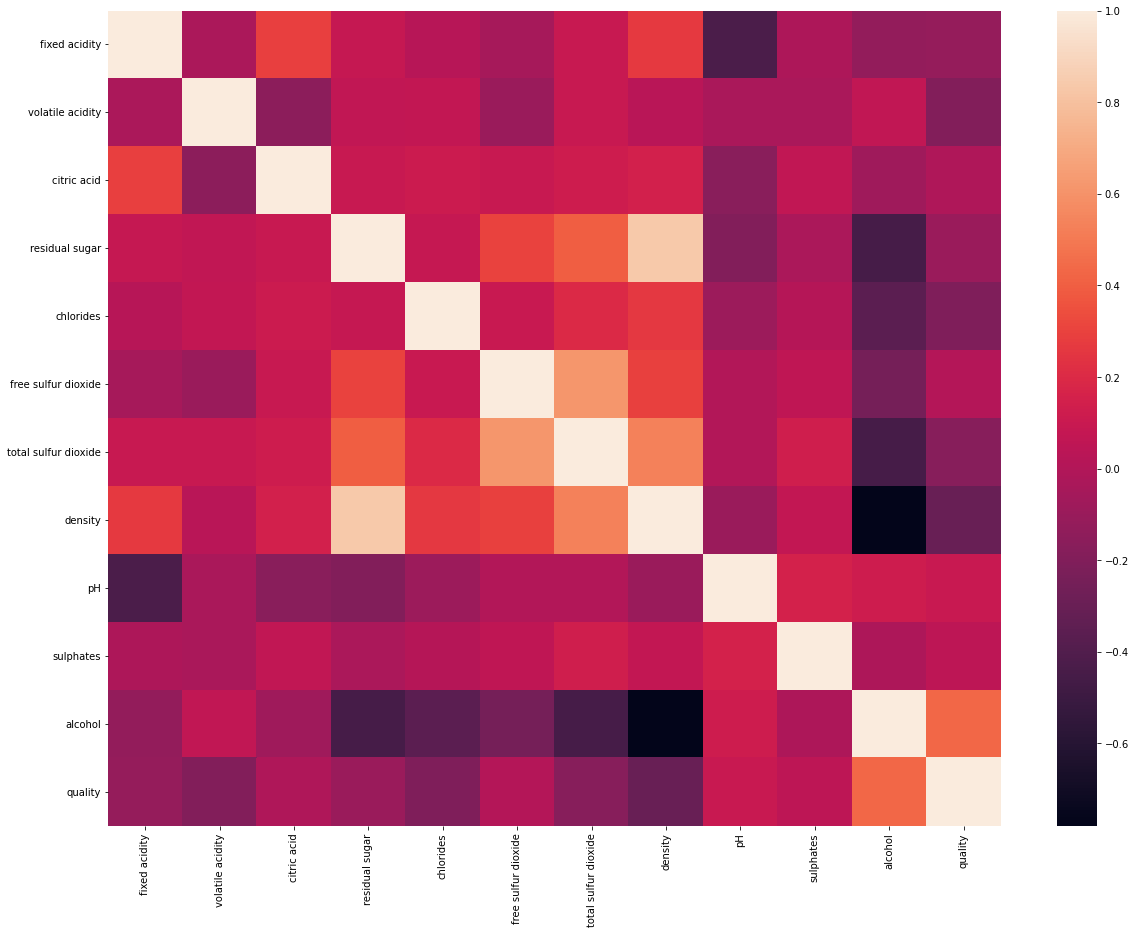

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), ax=ax)

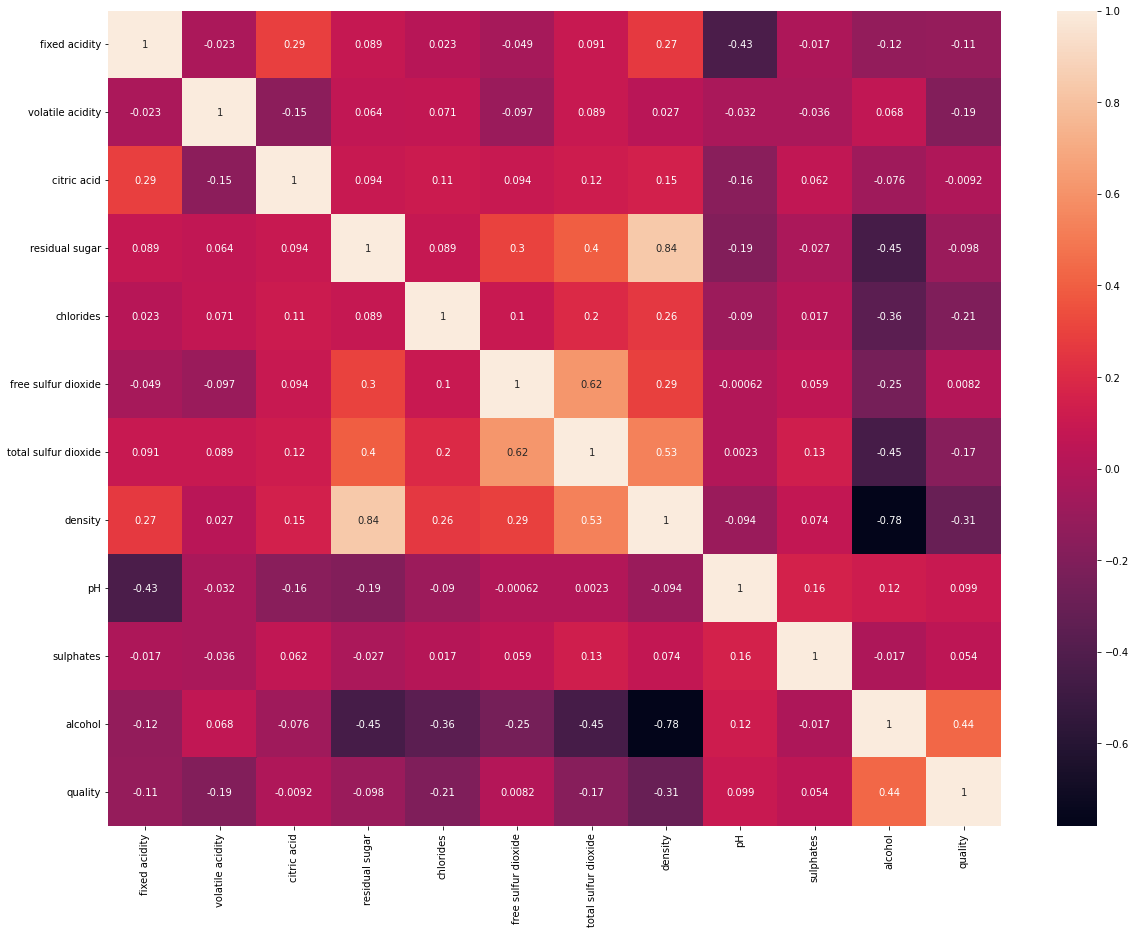

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True,ax= ax)

)# New Section
Here we can infer that “density” has strong positive correlation with “residual sugar” whereas it has strong negative correlation with “alcohol”.
“free sulphur dioxide” and “citric acid” has almost no correlation with “quality”.
Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you’re applying Linear Regression model to the dataset.


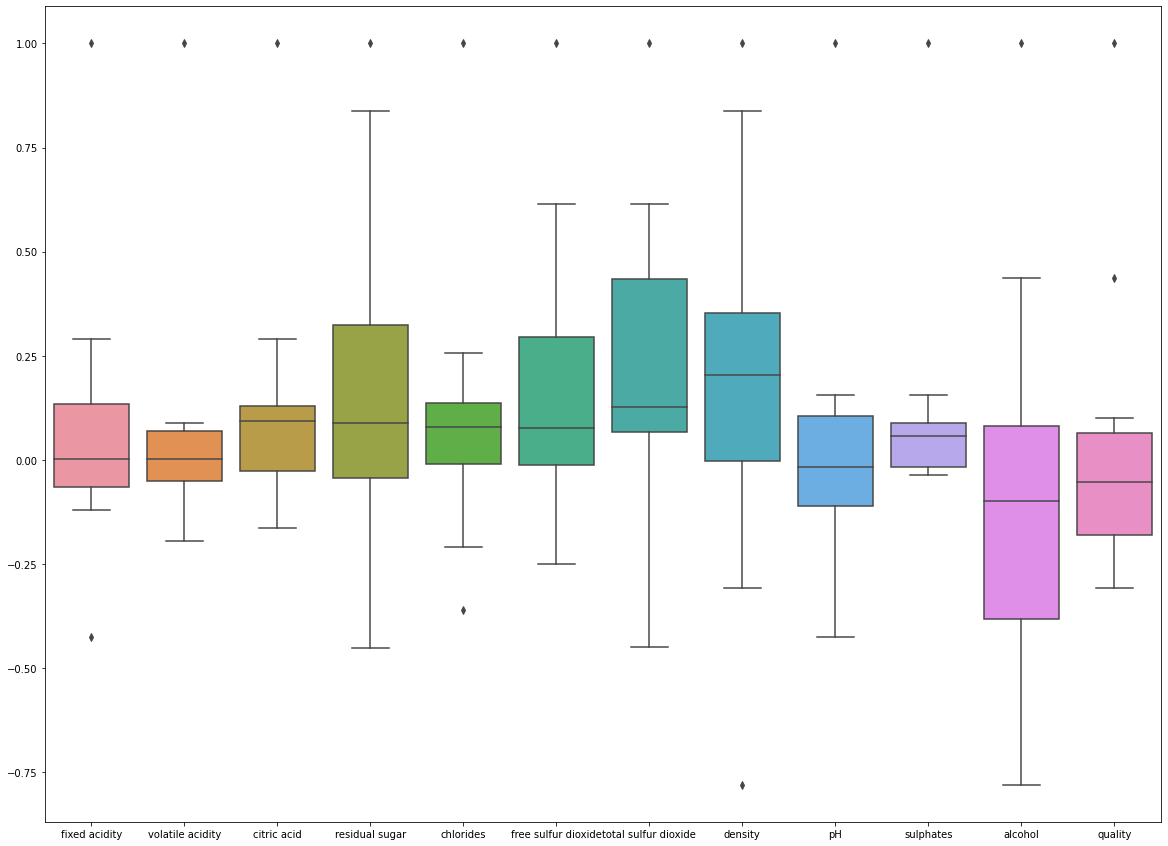

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
f = sns.boxplot(data= df.corr(),ax=ax)


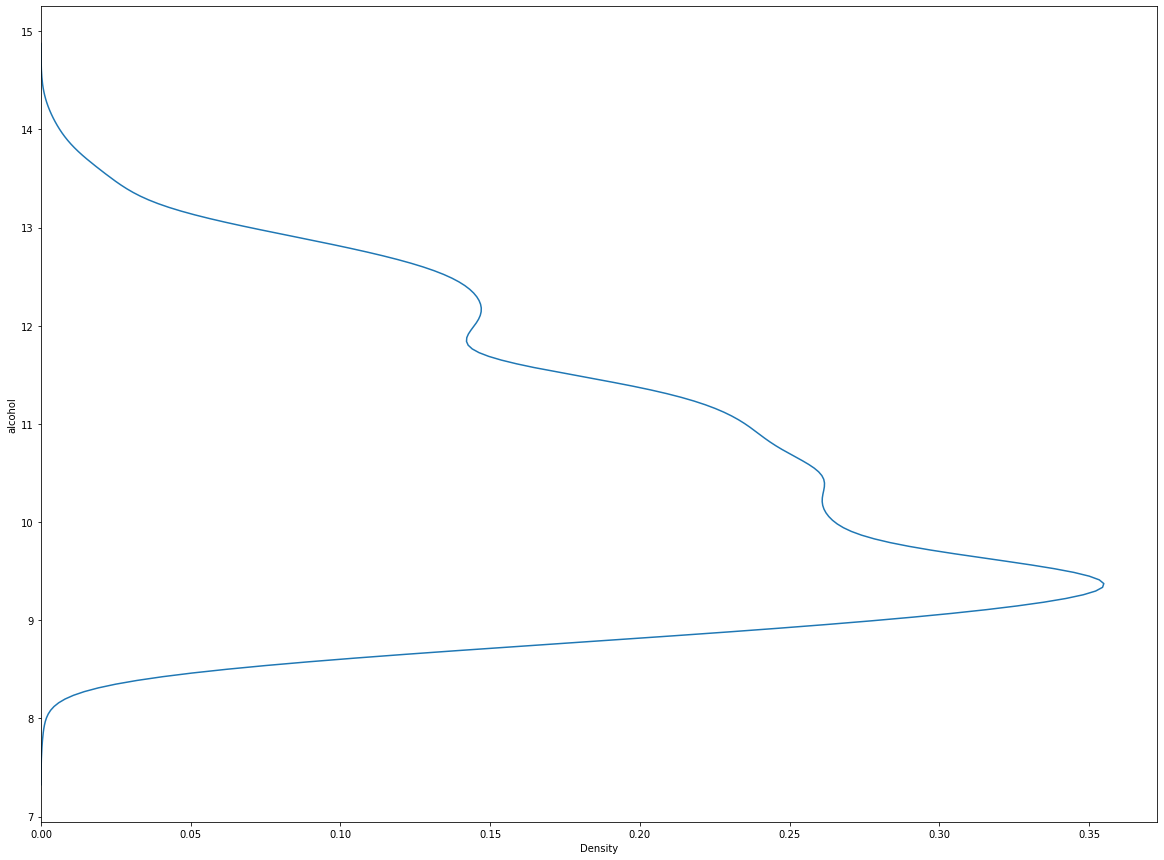

In [69]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.kdeplot(data=df,ax= ax,y='alcohol' )





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


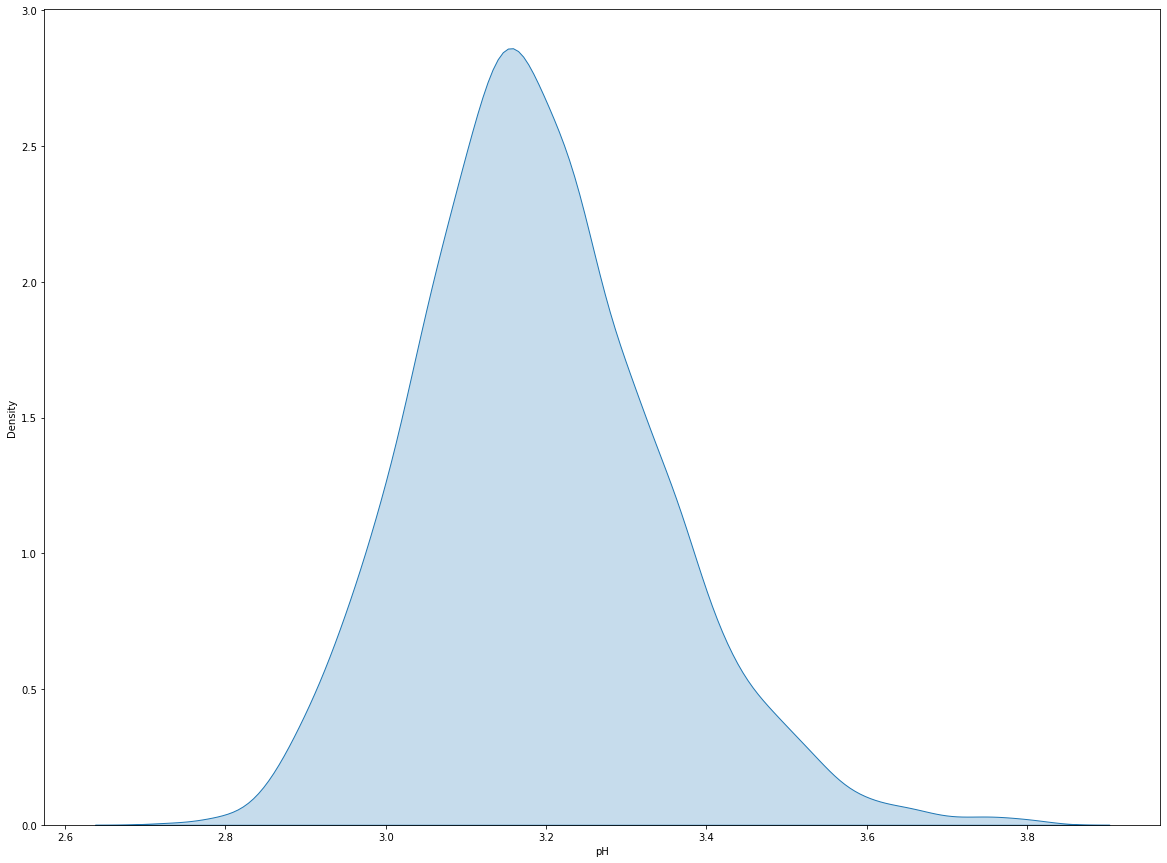

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.kdeplot(data=df,ax= ax,y='pH', vertical=True, shade='red' )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


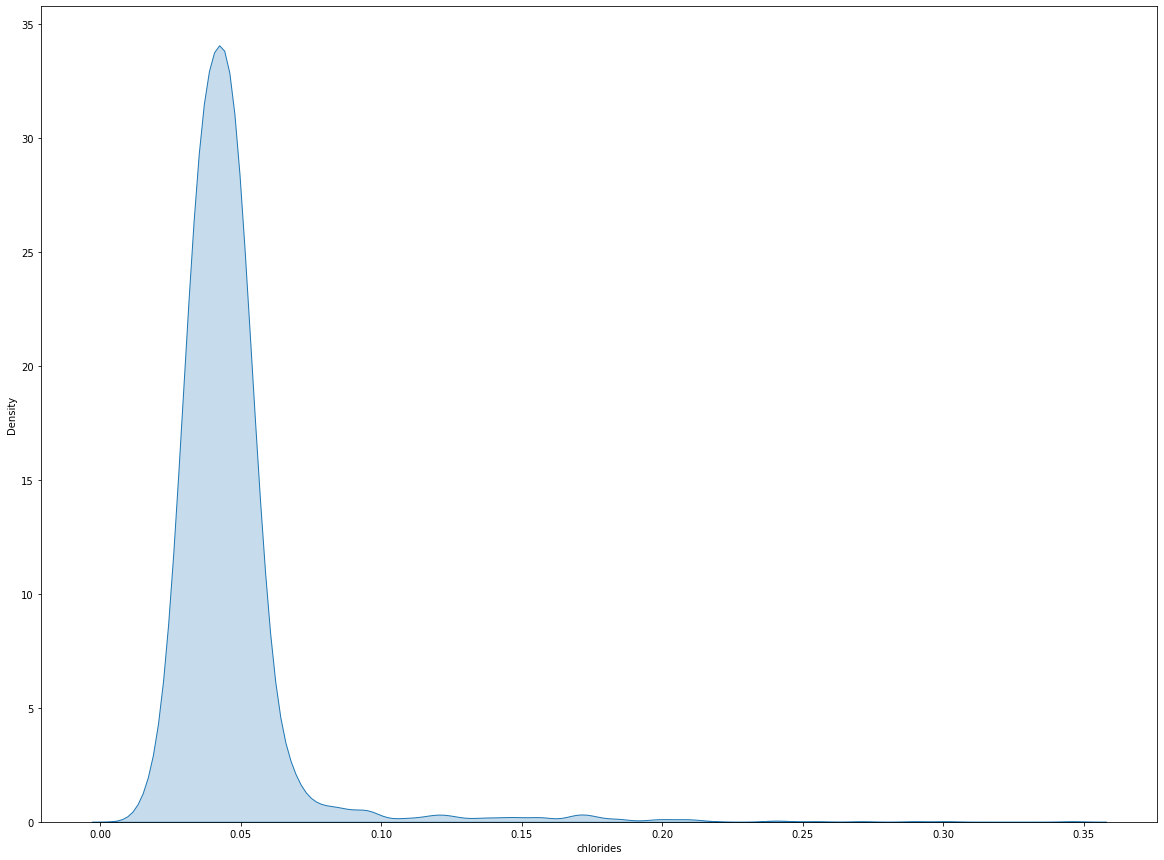

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.kdeplot(data=df,ax= ax,y='chlorides',vertical=True, shade=True  )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


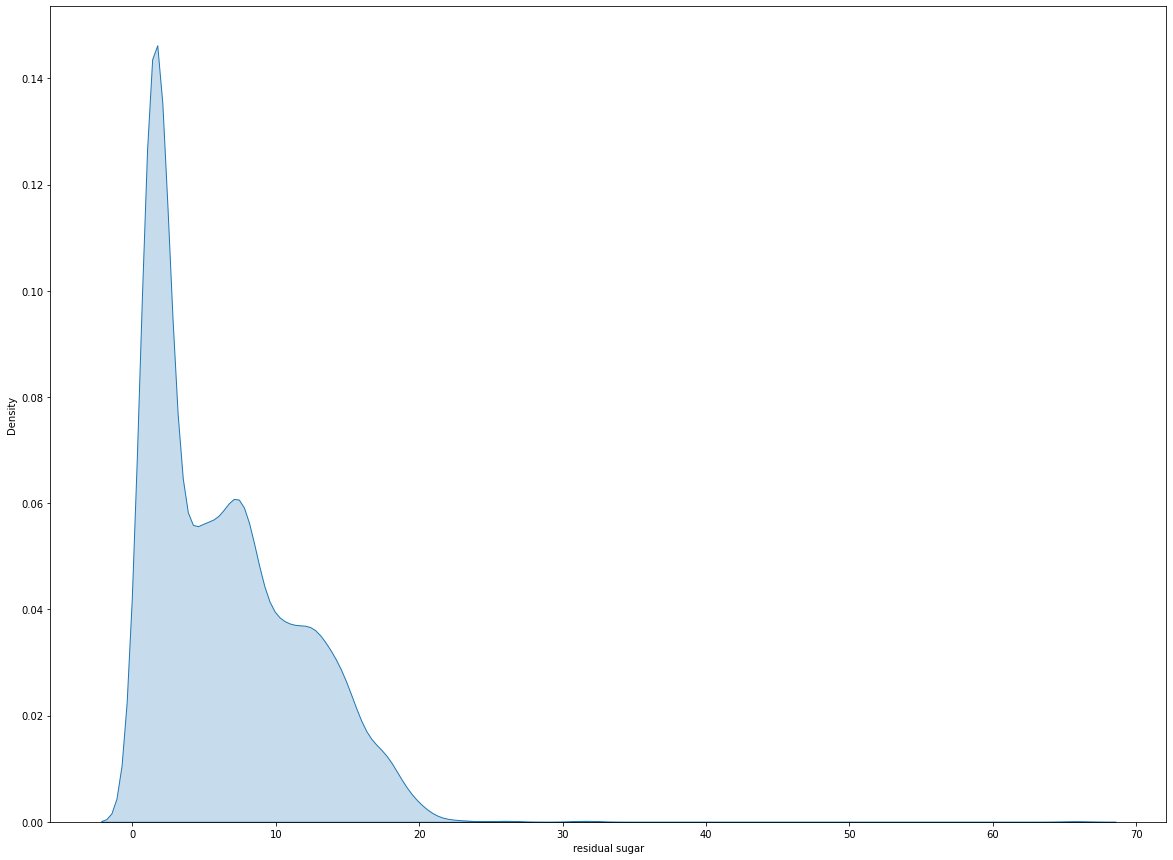

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.kdeplot(data=df,ax= ax,y='residual sugar', vertical=True, shade=True )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


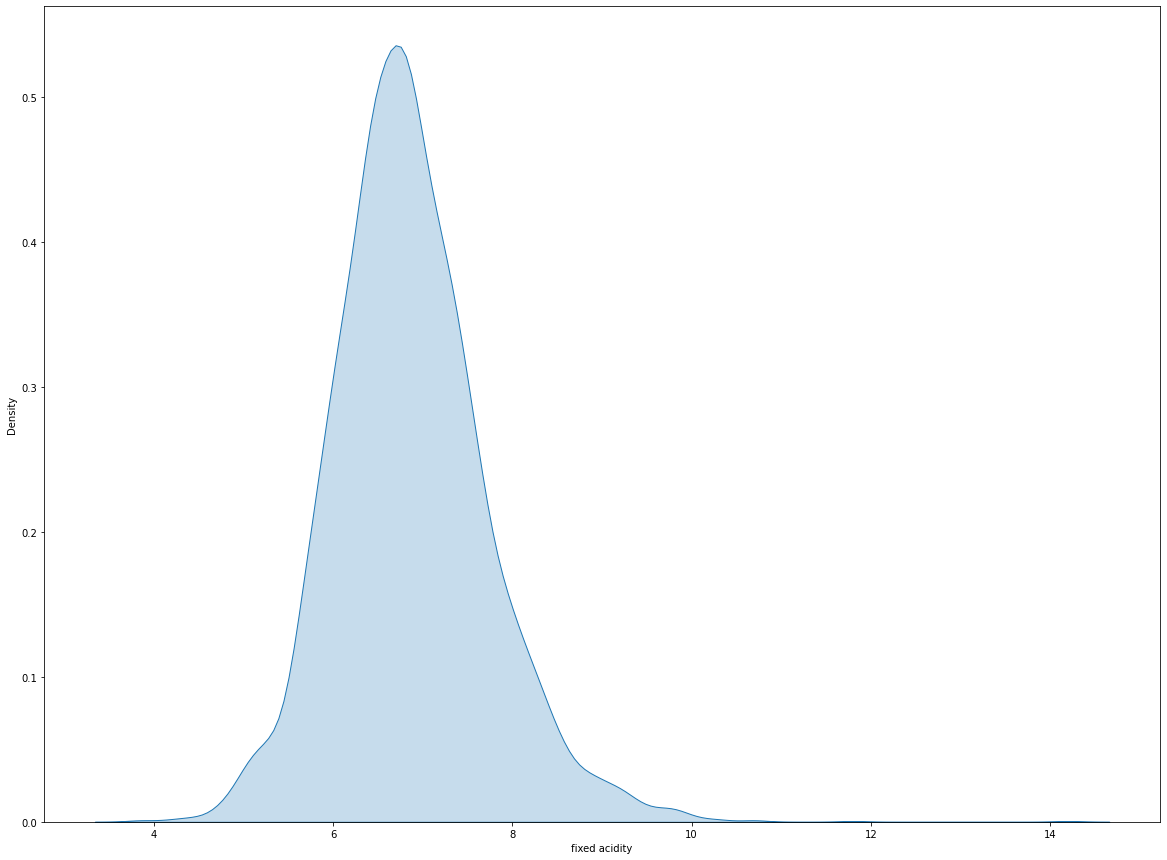

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.kdeplot(data=df,ax= ax,y='fixed acidity',shade=True, vertical=True )

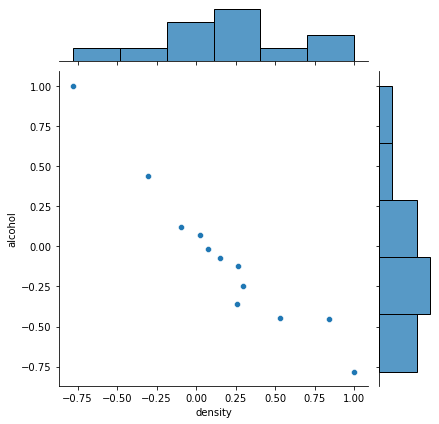

In [ ]:
sns.jointplot(data=df.corr(), x= 'density',y='alcohol')

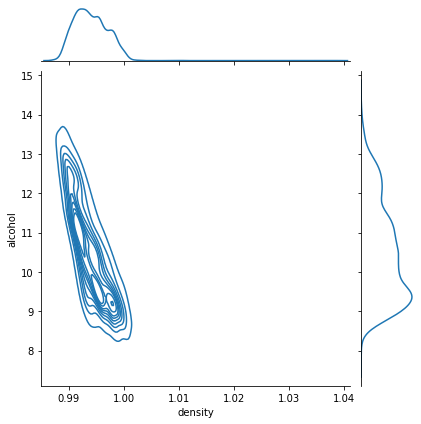

In [ ]:
sns.jointplot(data=df, x= 'density',y='alcohol', kind="kde")

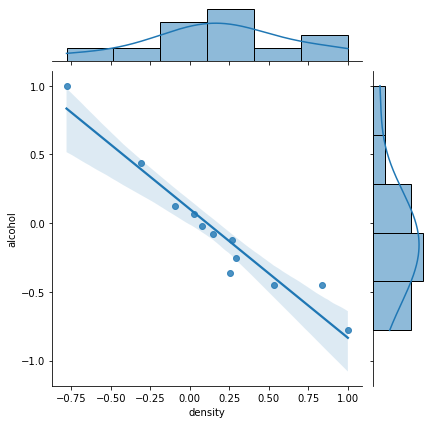

In [ ]:
sns.jointplot(data=df.corr(), x= 'density',y='alcohol', kind='reg')

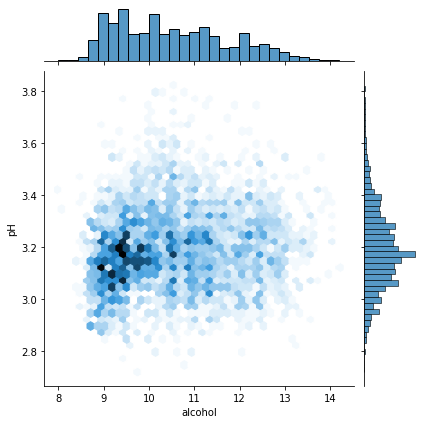

In [ ]:
sns.jointplot(data=df, x= 'alcohol',y='pH', kind='hex')

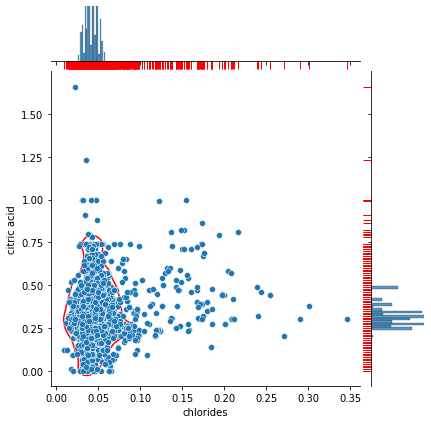

In [ ]:
g= sns.jointplot(data=df, x="chlorides", y="citric acid")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

**LINEAR REGRESSION**

In [90]:
#LR_simulator
